# [2021 Fall] Final Exam - Question 1

> Course: AP3021

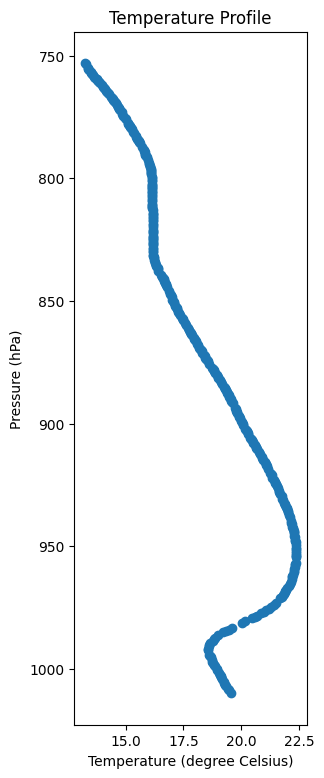

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#讀資料
with open("./data/obs_2021-03-18_12_00_00.sound") as a:
    for i in range(2):
        head=a.readline()
    data=a.readlines()
    T,P=np.zeros((len(data)))*np.nan,np.zeros((len(data)))*np.nan
    for i,tmp in enumerate(data):
        T[i]=tmp.split()[3]
        P[i]=tmp.split()[0]

#確認資料
plt.figure(figsize=(3,9))      
plt.scatter(T,P)
plt.gca().invert_yaxis()
plt.title("Temperature Profile")
plt.ylabel("Pressure (hPa)")
plt.xlabel("Temperature (degree Celsius)")
plt.show()

(a)

In [3]:
def D(l, y):    #微分，中插為主，前後為前插及後插
    ans = []
    h = float(l[1] - l[0])
    for i in range(0, len(l)):
        if i == 0:
            d = (float(y[i+1] - y[i])) / (h)
        elif i == len(l) - 1:
            d = (float(y[i] - y[i-1])) / (h)
        else:            
            d = (float(y[i+1] - y[i-1])) / (2*h)
        ans.append(d)
    return ans

temp_grad = D(P, T)
#print(temp_grad)

for i in range(0, len(temp_grad)):
    print('When P =', P[i], ', temperature gradient =', temp_grad[i])

1.
 (a):
When P = 1009.9839 , temperature gradient = 0.07667405009371818
When P = 1008.8101 , temperature gradient = 0.05111603339581111
When P = 1008.2232 , temperature gradient = 0.055375702845462796
When P = 1007.0579 , temperature gradient = 0.059635372295114474
When P = 1006.476 , temperature gradient = 0.029817686147557237
When P = 1005.894 , temperature gradient = 0.02555801669790707
When P = 1005.3077 , temperature gradient = 0.04259669449650926
When P = 1004.1254 , temperature gradient = 0.04685636394616094
When P = 1003.5343 , temperature gradient = 0.029817686147557237
When P = 1002.9434 , temperature gradient = 0.029817686147557237
When P = 1002.3524 , temperature gradient = 0.029817686147557237
When P = 1001.7685 , temperature gradient = 0.04259669449650926
When P = 1000.6122 , temperature gradient = 0.03833702504685909
When P = 1000.0319 , temperature gradient = 0.03407735559720892
When P = 998.8713 , temperature gradient = 0.051116033395812624
When P = 998.291 , temperat

(b) Newton finite difference

In [4]:
def Newt(x, y, n, x_miss):
    fdd = np.zeros((n, n))
    fdd[0:n, 0] = y[0:n]
    for j in range(1, n, 1):
        for i in range(0, n-j, 1):
            fdd[i, j] = (fdd[i+1, j-1] - fdd[i, j-1]) / (x[i+j] - x[i])
    y_interp = y[0]
    xterm = 1.0
    for order in range(1, n):
        xterm = xterm * (x_miss - x[order - 1])
        y_interp = y_interp + fdd[0, order] * xterm
    return y_interp

T_975 = Newt(P, T, 1, 975.0)
print('At the level of 975hpa, the temperature =', T_975, '(Newton)')

(b):
At the level of 975hpa, the temperature = 19.56 (Newton)


(c)

(c):


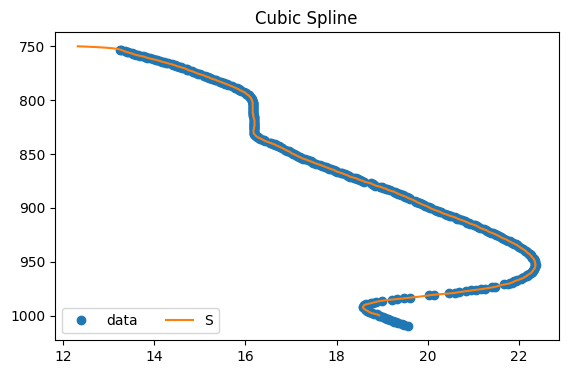

At the level of 975hpa, the temperature = 21.261616119949423 (Cubic)


In [5]:
from scipy.interpolate import CubicSpline

P_inv = []
T_inv = []
#將P從小排到大
for i in range(0, len(P)):
    P_inv.append(P[len(P) - i - 1])
    T_inv.append(T[len(P) - i - 1])
cs = CubicSpline(P_inv, T_inv)  #cubic spline
xs = np.arange(750, 1000, 0.1)

fig, ax  = plt.subplots(figsize = (6.5, 4))
plt.title('Cubic Spline')
ax.plot(T, P, 'o', label = 'data')
ax.plot(cs(xs), xs, label = "S")
plt.gca().invert_yaxis()
ax.legend(loc = 'lower left', ncol = 2)
plt.show()

print('At the level of 975hpa, the temperature =', cs(975.0), '(Cubic)')

(d) 拉格朗日

In [6]:
def Lagrage(x, y, f, n, x_miss):
  sum = 0.0
  for i in range(f, n):
    product = 1
    for j in range(f, n):
      if i != j:
        product = product * (x_miss - x[j]) / (x[i] - x[j])
    sum  = sum + product * y[i]
  return sum

for cou in range(11, len(P)-10):
    forw = Lagrage(P, T, cou-2, cou+9, (float(P[cou-2])+float(P[cou+10]))/2)
    midd = Lagrage(P, T, cou-5, cou+6, (float(P[cou-5])+float(P[cou+5]))/2)
    back = Lagrage(P, T, cou-8, cou+3, (float(P[cou-8])+float(P[cou+2]))/2)
    if max(forw, midd, back) == midd or min(forw, midd, back) == midd:
        print('The depth of inverse:', (float(P[cou-5])+float(P[cou+5]))/2)
    

#anssss =  Lagrage(P, T, 40, 46, 975.0)
#print('test2',anssss)


(d):
The depth of inverse: 993.6958999999999
The depth of inverse: 992.83705
The depth of inverse: 992.26265
The depth of inverse: 991.3994
The depth of inverse: 954.52215
The depth of inverse: 953.6986999999999
The depth of inverse: 952.8752999999999
The depth of inverse: 952.3272
The depth of inverse: 950.9594
The depth of inverse: 828.996
The depth of inverse: 828.0172500000001
The depth of inverse: 824.11275
The depth of inverse: 822.89855
The depth of inverse: 822.17005
The depth of inverse: 821.6844000000001
The depth of inverse: 820.4702
The depth of inverse: 819.01315
The depth of inverse: 815.6134500000001
The depth of inverse: 813.18505
The depth of inverse: 811.97215
The depth of inverse: 810.77215
The depth of inverse: 809.08655
The depth of inverse: 808.1247
The depth of inverse: 807.64375
The depth of inverse: 807.1628000000001
The depth of inverse: 806.43905
The depth of inverse: 805.24505
The depth of inverse: 803.34035
The depth of inverse: 802.14985
